In [23]:
import pandas as pd
import numpy as np

file_path = './data/HousingData.csv'  
data = pd.read_csv(file_path)


data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [24]:
print("Dataset Shape:", data.shape)
print("\nColumn Names:\n", data.columns)
print("\nData Types:\n")
print(data.dtypes)

print("\nMissing Values:\n")
print(data.isnull().sum())


Dataset Shape: (506, 14)

Column Names:
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

Data Types:

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

Missing Values:

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [25]:
data = data.fillna(data.mean())
print(data.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [26]:
from sklearn.model_selection import train_test_split
X= data.drop('MEDV',axis=1)
y=data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (404, 13)
Testing set shape: (102, 13)


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R-squared score:", r2)

Mean squared error:  25.017672023842596
R-squared score: 0.6588520195508154


In [28]:

feature_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

feature_coefficients


,Feature,Coefficient
5,RM,4.752410
3,CHAS,3.240673
8,RAD,0.222823
1,ZN,0.029016
11,B,0.012263
9,TAX,-0.009151
6,AGE,-0.019520
2,INDUS,-0.027133
0,CRIM,-0.114140
12,LSTAT,-0.438440


In [29]:

from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)


rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest MSE:", rf_mse)
print("Random Forest R-squared:", rf_r2)


Random Forest MSE: 8.227460519607844
Random Forest R-squared: 0.8878080447367498


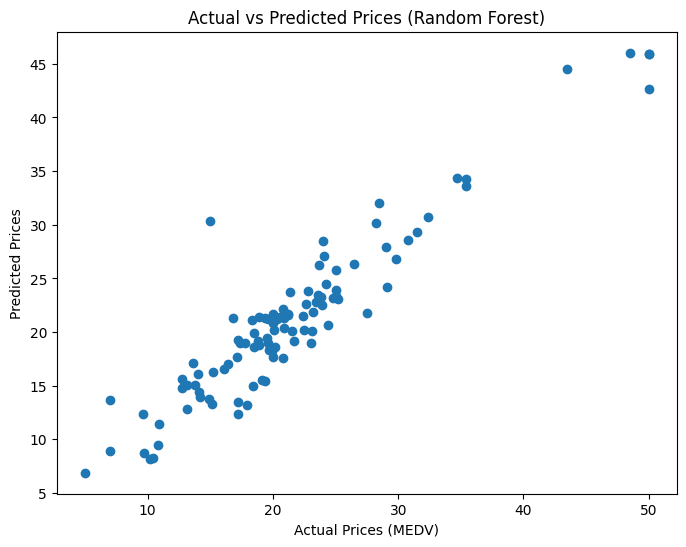

In [30]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))
plt.scatter(y_test, rf_pred)
plt.xlabel("Actual Prices (MEDV)")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.show()


    Feature  Importance
5        RM    0.560699
12    LSTAT    0.242797
7       DIS    0.059761
0      CRIM    0.042415
4       NOX    0.018138
9       TAX    0.017477
10  PTRATIO    0.017243
11        B    0.013651
6       AGE    0.012309
2     INDUS    0.007105
8       RAD    0.004370
1        ZN    0.002088
3      CHAS    0.001946


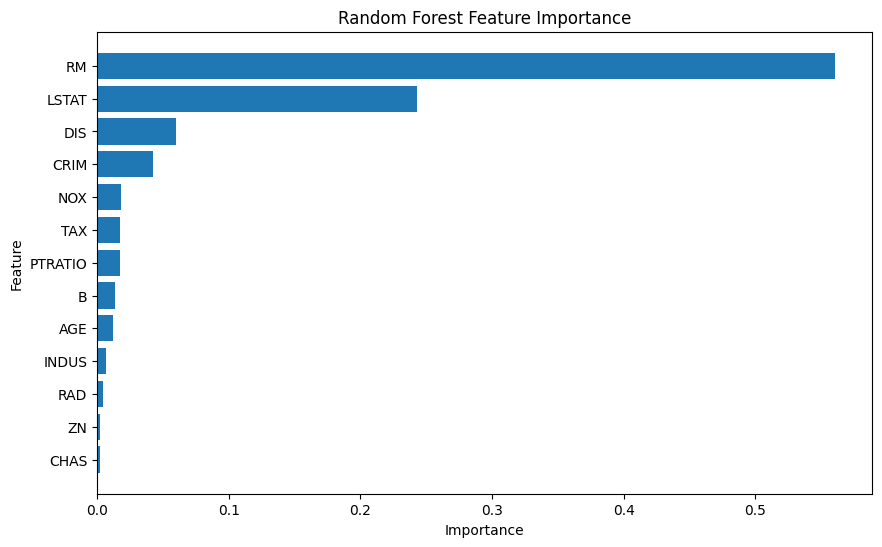

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


importances = rf_model.feature_importances_
feature_names = X.columns


feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


print(feature_importance_df)

plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()


In [32]:
#Optional Step: Hyperparameter Tuning using GridSearchCV (for testing best parameters)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_


from sklearn.metrics import mean_squared_error, r2_score

y_pred_best = best_model.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Tuned Random Forest MSE: {mse_best}")
print(f"Tuned Random Forest R-squared: {r2_best}")



Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest MSE: 8.4684514097385
Tuned Random Forest R-squared: 0.8845218254835606


In [33]:
import joblib


joblib.dump(rf_model, "boston_house_price_model.pkl")

print("Model saved successfully!")


Model saved successfully!
